In [2]:
import pandas as pd
from pandas import DataFrame
import math
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor

In [31]:
import nltk
import xlrd
import string
import nltk.corpus
from nltk.corpus import wordnet

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re
nltk.download('stopwords')
import nltk.corpus as corpus
nltk.download('vader_lexicon')
import re

stopwords = corpus.stopwords.words("english")

import ast 
from statistics import mean
import itertools
from itertools import chain
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read data 

train = pd.read_csv("/Users/apple/Desktop/untitled folder/train.tsv/train.tsv", delimiter = "\t", encoding = "utf-8", index_col = False)
train_df = train.iloc[:5000, :]
test_df = train.iloc[5000:8000, :]


# need to identify outliers

In [27]:
name = train_df['name']
des = train_df['item_description']

In [54]:
def get_sentiment(des):
    
    des = list(des)
    def get_adj_and_adv(text):
        """
        This functionis to firstly tokenize the words and then select
        the words that is tagged as adverbe and adjective
        """
        text_lower = text.lower()
        text_token = word_tokenize(text_lower)
        result_tags = nltk.pos_tag(text_token)
    
        words = [(word) for word, tag in result_tags if tag in ('JJ','RB')]
        return (words)
    def get_noun(text):
        """
        This functino is to tokenize the words and select the words
        that is tagged as noun
        """
        text_lower = text.lower()
        text_token = word_tokenize(text_lower)
        result_tags = nltk.pos_tag(text_token)
    
        words = [(word) for word, tag in result_tags if tag in ('NN')]
        return (words)
    
    
    def nltk_sentiment(sentence):
        """
        This function is to process the sentiment on each tokenized sentences
        and then generate a sentiment value for each sentence
        """
    
        nltk_sentiment = SentimentIntensityAnalyzer()
        score = nltk_sentiment.polarity_scores(sentence)
        return score
    sen_tok = [sent_tokenize(des[i]) for i in range(len(des))]

    sen_tok_total = [''.join(sen_tok[i]) for i in range(len(sen_tok))]

    x = [nltk_sentiment(sen_tok_total[i]) for i in range(len(sen_tok_total))]

    x1 = [(list(x[i].items())[-1][1]) for i in range(len(x)) ]
    
    return x1
    

In [188]:
def get_length_of_des(df):
    des = list(df['item_description'])
    text_token = [word_tokenize(des[i]) for i in range(len(des))]
    length = [len(text_token[i] ) for i in range(len(text_token))]
    return length

In [ ]:
des =  [re.sub(r'[^\w\s]','',des_train[i]) for i in range(len(des_train))]

des_noun = [get_noun(des[i]) for i in range(len(des))] # get the noun for 

des_adj = [get_adj_and_adv(des[i]) for i in range(len(des))]

des_noun_total = [j for i in des_noun for j in i]
# combine the nouns to one list
des_adj_total = [j for i in des_adj for j in i]
#combine the adjs to one list

text_token = [word_tokenize(des[i]) for i in range(len(des))]

text_token_total = [j for i in text_token for j in i]


# these are the stop words we want to remove 
exclude_noun = ['i','food']
exclude_adj = ['not','i','so','very','here','just','also','really','too','well','other','first','','restaurant','next','then','as','lo','as','again']
des_noun_total_re_stopwords = [w for w in des_noun_total if w  not in exclude_noun ]

des_adh_total_re_stopwords = [w for w in des_adj_total if w  not in exclude_adj ]
fd_n = nltk.FreqDist(des_noun_total_re_stopwords)
fd_a = nltk.FreqDist(des_adh_total_re_stopwords)



In [10]:
sub_cats_train = split_label(train_df["category_name"])
sub_cats_test = split_label(test_df["category_name"])

In [11]:
train_df.reset_index(drop=True, inplace=True)
sub_cats_train.reset_index(drop=True, inplace=True)

df_w_subcats = pd.concat([train_df,sub_cats_train],axis = 1) 
# combine the subcats to the dataframe

In [24]:
df_w_subcats

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,None,10.0,1,None,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,None,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,None,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
5,5,Bundled items requested for Ruie,3,Women/Other/Other,None,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,None,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll


In [6]:
def missing_value(df):
    """
    Handeling any missing value in the dataframe.
    """
    df["item_description"][df['item_description'] == "No description yet"] = "None"
    return df.fillna("None")

In [7]:
train_df = missing_value(train_df)
test_df = missing_value(test_df)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWi

In [8]:
def split_label(cat):
    """
    This function splits the category into three sub categories.
    """
    cat_split = cat.str.split("/",n = 2,expand = True)
    cat_split = cat_split.rename(index = str,columns = {0:'cat1',1:'cat2',2:'cat3'})
    cat_split = cat_split.fillna("None")
    
    return cat_split


In [145]:
def label_cat_encoder(sub_cat):
    from sklearn import preprocessing
    
    from sklearn.preprocessing import OneHotEncoder
    
    
    le = preprocessing.LabelEncoder()
    label_cat = le.fit_transform(sub_cat.astype(str))

    return label_cat
    

In [144]:
sub_cats = split_label(train_df["category_name"])
label_cat_encoder(sub_cats['cat1'])
#sub_cats_encode = [label_cat_encoder(x) for x in sub_cats]

array([ 5,  1, 10, ...,  1, 10,  0])

In [212]:
def variable_process(df):


    sub_cats = split_label(df["category_name"])
    sub_cat_1_encoder = pd.DataFrame(label_cat_encoder(sub_cats['cat1']),columns = ["cat1"])
    sub_cat_2_encoder = pd.DataFrame(label_cat_encoder(sub_cats['cat2']),columns = ['cat2'])
    sub_cat_3_encoder = pd.DataFrame(label_cat_encoder(sub_cats['cat2']),columns = ["cat3"])
    brand_encoder = pd.DataFrame(label_cat_encoder(df['brand_name']),columns = ['brand'])
    
    length = pd.DataFrame(get_length_of_des(df),columns = ['length of description'])
    sentiment_name = get_sentiment(df['name'])
    sentiment_des = get_sentiment(df['item_description'])
    columns = (df[["shipping"]].values, df[["item_condition_id"]].values)
    columns_names = ("shipping", "item_condition")
    variable_df = pd.DataFrame(np.concatenate(columns, axis = 1), columns = columns_names)
    variable_df.reset_index(drop=True, inplace=True)
    #senti_name_df = pd.DataFrame(sentiment_name,columns = ["Sentiment_name"])
    #senti_name_df.reset_index(drop=True, inplace=True)
    senti_des_df = pd.DataFrame(sentiment_des,columns = ["Sentimen_description"])
    senti_des_df.reset_index(drop=True, inplace=True)
    #return variable_df
    
    return pd.concat([variable_df,sub_cat_1_encoder,sub_cat_2_encoder,sub_cat_3_encoder,brand_encoder,senti_des_df],axis = 1)


    #return pd.concat([variable_df,senti_des_df],axis = 1,ignore_index = True)
    

In [213]:
test_df_label = variable_process(test_df)

train_df_label = variable_process(train_df)

In [214]:
reg = LinearRegression().fit(train_df_label, y)

In [215]:
price_test = price(test_df)

In [216]:
reg.score(test_df_label,price_test)

0.07017292609104431

In [217]:
result = reg.predict(test_df_label)

In [218]:
np.sqrt(mean_squared_error(price_test, result))

0.7045402065301154

In [14]:
def encode(sub_cat_train, sub_cat_test):
    """
    This function one hot encode category variables for the training set and the testing set.
    """
    
    from sklearn.preprocessing import OneHotEncoder
    onehotencoder = OneHotEncoder(handle_unknown='ignore')
    
    one_hot_train = onehotencoder.fit_transform(sub_cat_train.values).toarray()

    one_hot_test = onehotencoder.transform(sub_cat_test.values).toarray()
    
    return [one_hot_train, one_hot_test]
    

In [15]:
def label_encoder(sub_cat_train, sub_cat_test):
    
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    
    label_train = le.fit_transform(sub_cat_train.astype(str))
    label_test = le.transform(sub_cat_test.astype(str))
    
    return [label_train, label_test]
    
    

In [134]:
def encoder(sub_cat):
    """
    The is the Label encoder only apply on the column of the data_frame 
    from the split_label
    """
    from sklearn import preprocessing
    from sklearn.preprocessing import OneHotEncoder
    le = preprocessing.LabelEncoder()
    label_cat = le.fit_transform(sub_cat.astype(str))
    
    label_cat = onehotencoder.fit_transform(label_cat.reshape(-1,1)).toarray()

    return label_cat


In [128]:
X = encode(train_df_label, test_df_label)

In [133]:
X_1 = label_encoder(train_df_label,test_df_label)

ValueError: bad input shape (5000, 6)

In [102]:
def price(df):
    price = df['price'].values
    return np.log(price+1)

In [129]:
y = price(train_df)
reg = LinearRegression().fit(X[0], y)

In [130]:
reg.score(X[0], y)

0.5052529635134537

In [131]:
result = reg.predict(X[1])
actual = price(test_df)

In [132]:
np.sqrt(mean_squared_error(actual, result))

196060529117.66357

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed = pca.fit_transform(X[0])

In [37]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=2, kernel = 'sigmoid', gamma = 0.5) 
transformed_kpca= transformer.fit_transform(X[0])

In [43]:
train_df["price_label"] = pd.cut(y, 5, labels= ["very cheap", "cheap", "Medium", "expensive", "very expensive"])

In [112]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# pca = PCA(n_components=2)
# transformed = pca.fit_transform(X[0])



sns.scatterplot(transformed_kpca[:,0], transformed_kpca[:,1], hue = train_df["price_label"], alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.colorbar(train_df["price"])


# points = plt.scatter(transformed[:,0], transformed[:,1],
#                      c = train_df["price_label"].astype(str) ) #set style options

#add a color bar
#plt.colorbar(points)

NameError: name 'transformed_kpca' is not defined

In [51]:
from sklearn.manifold import TSNE
transformed_tsne = TSNE(n_components=2).fit_transform(X[0])


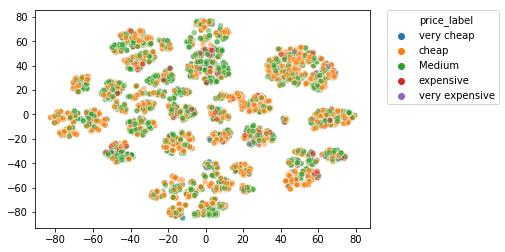

In [52]:
sns.scatterplot(transformed_tsne[:,0], transformed_tsne[:,1], hue = train_df["price_label"], alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)